# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2

In [2]:
# Your code here
Fraud = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
Fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
Fraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
Fraud_rnd_sample = Fraud.sample(n=100000, random_state=1)

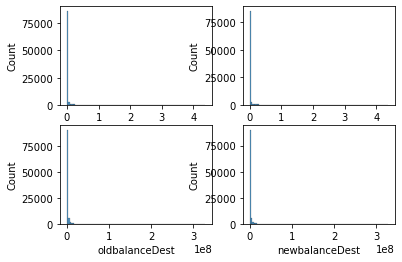

In [7]:
fig, axs = plt.subplots(2, 2)
sns.histplot(Fraud_rnd_sample, x="oldbalanceOrg", bins = 100, ax = axs[0,0])
sns.histplot(Fraud_rnd_sample, x="newbalanceOrig", bins = 100,ax = axs[0,1])
sns.histplot(Fraud_rnd_sample, x="oldbalanceDest", bins = 100,ax = axs[1,0])
sns.histplot(Fraud_rnd_sample, x="newbalanceDest", bins = 100,ax = axs[1,1])
plt.show()

# It seems to be greatly skewed.
# In addition, columns with exact zeros removed. 
# Nevertheless, it remains very skewed to low values.

In [8]:
print('0s Rate - oldbalanceOrg:',round(100*len(Fraud[Fraud['oldbalanceOrg'] == 0])/len(Fraud),2),'%')
print('0s Rate - newbalanceOrig:',round(100*len(Fraud[Fraud['newbalanceOrig'] == 0])/len(Fraud),2),'%')
print('0s Rate - oldbalanceDest:',round(100*len(Fraud[Fraud['oldbalanceDest'] == 0])/len(Fraud),2),'%')
print('0s Rate - newbalanceDest:',round(100*len(Fraud[Fraud['newbalanceDest'] == 0])/len(Fraud),2),'%')

0s Rate - oldbalanceOrg: 33.04 %
0s Rate - newbalanceOrig: 56.73 %
0s Rate - oldbalanceDest: 42.5 %
0s Rate - newbalanceDest: 38.34 %


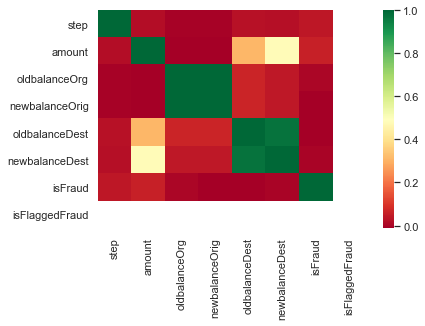

In [9]:
corr = Fraud_rnd_sample.corr()
sns.set_theme(style="white")
sns.heatmap(corr, cmap = plt.cm.RdYlGn)
plt.show()

In [10]:
Fraud_rnd_sample['type'].value_counts().reset_index()

,index,type
0,CASH_OUT,35209
1,PAYMENT,33694
2,CASH_IN,21987
3,TRANSFER,8416
4,DEBIT,694


### What is the distribution of the outcome? 

In [11]:
# Your response here
print('Fraud Count:',len(Fraud[Fraud['isFraud'] == 1]))
print('Not Fraud Count:',len(Fraud[Fraud['isFraud'] == 0]))
print('Fraud Rate:',round(100*len(Fraud[Fraud['isFraud'] == 1])/len(Fraud),2),'%')

Fraud Count: 8213
Not Fraud Count: 6354407
Fraud Rate: 0.13 %


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [12]:
# Your code here
# Time of the day may be relevant for the analysis.
# Therefore, assuming 1 represents one given starting hour, 
# we can perform an analysis on the modulo of 24 and get the hour of the day and do dummies.
Fraud_clean = Fraud
Fraud_clean['Step_Modulo_24'] = Fraud_clean['step'].mod(24)

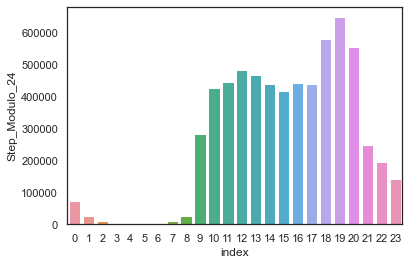

In [14]:
sns.barplot(x = Fraud_clean['Step_Modulo_24'].value_counts().reset_index()["index"],y = Fraud_clean['Step_Modulo_24'].value_counts().reset_index()["Step_Modulo_24"])
plt.show()  
# Indeed, that assumption seems to make sense.
# It could also be the case that the step modulo matches with the real hour.
# It may be worth to note that the data set depicts that people are mostly asleep from 2am to 6am, which seems reasonable.

In [15]:
Fraud_clean['nameOrig_first_char'] = Fraud_clean['nameOrig'].astype(str).str[0]
Fraud_clean['nameOrig_first_char'].value_counts() ### Just 'C', will drop this.

Fraud_clean['nameDest_first_char'] = Fraud_clean['nameDest'].astype(str).str[0]
Fraud_clean['nameDest_first_char'].value_counts() ### Two different accounts, will dummy this.

Fraud_clean['nameOrig_len'] = Fraud_clean['nameOrig'].str.len()
Fraud_clean['nameDest_len'] = Fraud_clean['nameDest'].str.len()

In [16]:
Fraud_clean['nameOrig_len'].value_counts() 
# Might just do 11, 10 and Other.

11    3398630
10    2667372
9      266807
8       26789
7        2718
6         269
5          35
Name: nameOrig_len, dtype: int64

In [17]:
replace_dict = {11:11,10:10,9:'Other',8:'Other',7:'Other',6:'Other',5:'Other'}
Fraud_clean.replace({"nameOrig_len": replace_dict}, inplace = True)
replace_dict = {11:11,10:10,9:'Other',8:'Other',7:'Other',6:'Other',5:'Other',4:'Other',2:'Other'}
Fraud_clean.replace({"nameDest_len": replace_dict}, inplace = True)

In [18]:
Fraud_clean = pd.get_dummies(Fraud_clean, columns=['Step_Modulo_24','type','nameOrig_len','nameDest_len','nameDest_first_char'])

In [19]:
Fraud_clean = Fraud_clean.drop(['nameOrig_first_char','nameOrig','nameDest','step'], axis =1)

In [20]:
y = Fraud_clean["isFraud"]
x = Fraud_clean.drop('isFraud', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=15)

In [21]:
# Normalize amounts of money (amount, oldbalancedOrg, newbalanceOrig, oldbalanceDest, newbalanceDest)
def scale_func(x):
    mymax = np.max(x)
    mymin = np.min(x)
    myamplitude = mymax - mymin
    mylist = []
    for ele in x:
        mylist.append((ele - mymin)/myamplitude)
    return mylist

warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")
x_train['amount_scaled'] = scale_func(x_train['amount'])
x_train['oldbalanceOrg_scaled'] = scale_func(x_train['oldbalanceOrg'])
x_train['oldbalanceDest_scaled'] = scale_func(x_train['oldbalanceDest'])
x_train['newbalanceOrig_scaled'] = scale_func(x_train['newbalanceOrig'])
x_train['newbalanceDest_scaled'] = scale_func(x_train['newbalanceDest'])

x_test['amount_scaled'] = scale_func(x_test['amount'])
x_test['oldbalanceOrg_scaled'] = scale_func(x_test['oldbalanceOrg'])
x_test['oldbalanceDest_scaled'] = scale_func(x_test['oldbalanceDest'])
x_test['newbalanceOrig_scaled'] = scale_func(x_test['newbalanceOrig'])
x_test['newbalanceDest_scaled'] = scale_func(x_test['newbalanceDest'])
warnings.filterwarnings("default")

x_train = x_train.drop(['amount','oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest'], axis =1)
x_test = x_test.drop(['amount','oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest'], axis =1)

warnings.filterwarnings("default")

### Run a logisitc regression classifier and evaluate its accuracy.

In [ ]:
# Your code here
model = LogisticRegression(max_iter=1000)
model = model.fit(x_train, y_train)

print("Test accuracy:", model.score(x_test,y_test))
print("Train accuracy:", model.score(x_train, y_train))

y_pred = model.predict(x_test)
score = f1_score(y_test, y_pred, average='binary')

# print("Classification report:", classification_report(y_pred,y_test))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:", confusion_matrix(model.predict(x_test),y_test))
# print("Test data accuracy:", model.score(x_test,y_test))
print("Train data accuracy:", model.score(x_train, y_train))
print('F-Measure: %.3f' % score)

scores, pvalues = chi2(x_train, y_train)
print('p-values',pvalues)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
'''
The model does look very accurate, but the confusion matrix reveals that the model is rather 
not accurate when dealing with the fraud cases, which is actually the desired outcome.
It is worth to note that the amount of fraud cases is very limited in the dataset.
This is captured in the very "iffy" f1 score.
'''

### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# Your code here
# Considering the size of the dataset, no issues should arise with regards to the data.
NotFraud = Fraud_clean[Fraud_clean['isFraud'] == 0]
Fraud = Fraud_clean[Fraud_clean['isFraud'] == 1]

NotFraud_downsampled = resample(NotFraud,replace=True,n_samples=len(Fraud),random_state=15)
Fraud_clean_downsampled = Fraud.append(NotFraud_downsampled)

y = Fraud_clean_downsampled["isFraud"]
x = Fraud_clean_downsampled.drop('isFraud', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=15) 

warnings.filterwarnings("ignore")
x_train['amount_scaled'] = scale_func(x_train['amount'])
x_train['oldbalanceOrg_scaled'] = scale_func(x_train['oldbalanceOrg'])
x_train['oldbalanceDest_scaled'] = scale_func(x_train['oldbalanceDest'])
x_train['newbalanceOrig_scaled'] = scale_func(x_train['newbalanceOrig'])
x_train['newbalanceDest_scaled'] = scale_func(x_train['newbalanceDest'])

x_test['amount_scaled'] = scale_func(x_test['amount'])
x_test['oldbalanceOrg_scaled'] = scale_func(x_test['oldbalanceOrg'])
x_test['oldbalanceDest_scaled'] = scale_func(x_test['oldbalanceDest'])
x_test['newbalanceOrig_scaled'] = scale_func(x_test['newbalanceOrig'])
x_test['newbalanceDest_scaled'] = scale_func(x_test['newbalanceDest'])
warnings.filterwarnings("default")

x_train = x_train.drop(['amount','oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest','nameOrig_len_10','nameOrig_len_11','nameOrig_len_Other','nameDest_len_10','nameDest_len_11','nameDest_len_Other'], axis =1)
x_test = x_test.drop(['amount','oldbalanceOrg','oldbalanceDest','newbalanceOrig','newbalanceDest','nameOrig_len_10','nameOrig_len_11','nameOrig_len_Other','nameDest_len_10','nameDest_len_11','nameDest_len_Other'], axis =1)

model = LogisticRegression(max_iter=1000)
model = model.fit(x_train, y_train)

print("Test accuracy:", model.score(x_test,y_test))
print("Train accuracy:", model.score(x_train, y_train))

y_pred = model.predict(x_test)
score = f1_score(y_test, y_pred, average='binary')

# print("Classification report:", classification_report(y_pred,y_test))
# print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(model.predict(x_test),y_test))
# print("Test data accuracy:", model.score(x_test,y_test))
print("Train data accuracy:", model.score(x_train, y_train))
print('F-Measure: %.3f' % score)

### Which model worked better and how do you know?

In [2]:
# Your response here
# The second model has a better F measure and therefore more accuracy in dectecting the actual fraud cases, mostly coming from the downsampling.